# **Multiple Linear Regression**

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

In Simple Linear Regression,  a single Independent/Predictor(X) variable is used to model the response variable (Y). But there may be various cases in which the response variable is affected by more than one predictor variable; for such cases, the Multiple Linear Regression algorithm is used.

**Some key points about MLR:**
- For MLR, the dependent or target variable(Y) must be the continuous/real, but the predictor or independent variable may be of continuous or categorical form.
- Each feature variable must model the linear relationship with the dependent variable.
- MLR tries to fit a regression line through a multidimensional space of data-points.

## **MLR equation:**
In Multiple Linear Regression, the target variable(Y) is a linear combination of multiple predictor variables x1, x2, x3, ...,xn. Since it is an enhancement of Simple Linear Regression, so the same is applied for the multiple linear regression equation, the equation becomes:

**Y= c + m1x1 +m2x2 +m3x3…….. +mnxn**

Where,

- Y= Output/Response variable
- m1, m2, m3, ….. an= Coefficients of the model.
- x1, x2, x3, …xn= Various Independent/feature variable

**Assumptions for Multiple Linear Regression:**

- A linear relationship should exist between the Target and predictor variables.
- MLR assumes little or no multicollinearity (correlation between the independent variable) in data.

**Problem Statement example for Multiple Linear Regression:**

We have a dataset of 50 start-up companies. This dataset contains five main information: R&D Spend, Administration Spend, Marketing Spend, State, and Profit for a financial year. Our goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.

**startups_50.csv**


![alt text](https://lh3.googleusercontent.com/Qzf7cRDrAElUej30bH7k5MRDxMC744TjlfU0xRFBFp247ICfMvjk_9C0VSOHz_9casZhpXe02AbaahTw3kBqfKgDjCpJ_ZoXlFofiZkgrs9lSxpZeXfiwutVM7vaEhwtrOxGbu58)

Since we need to find the Profit, so it is the dependent variable, and the other four variables are independent variables. Below are the main steps of deploying the MLR model:

- Data Pre-processing Steps
- Fitting the MLR model to the training set
- Predicting the result of the test set

**Getting started**
 
In Spyder IDE, the folder containing the code file must be saved as a working directory, and the dataset or csv file should be in the same folder.

**C:\Machine learning\Regression\MLR**

# **Step 1: Data Preprocessing**
**Importing libraries:** Firstly we will import the library which will help in building the model. Below is the code for it:


In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./data_folder/startups_50.xlsx")

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In the above output, we can clearly see that there are five variables, in which four variables are continuous (R&D, Administration, Marketing Spend, Profit) and one is categorical variable (State).

**Extracting dependent and independent Variables:**


Let's have some visualization..


In [5]:
import matplotlib.pyplot as plt

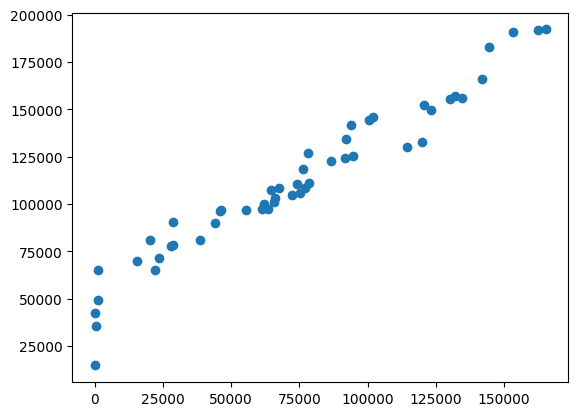

In [6]:
plt.scatter(df["R&D Spend"].values, df.Profit.values)

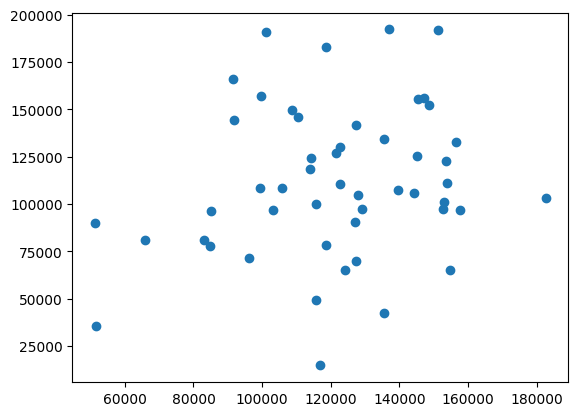

In [7]:
plt.scatter(df.Administration.values, df.Profit.values)

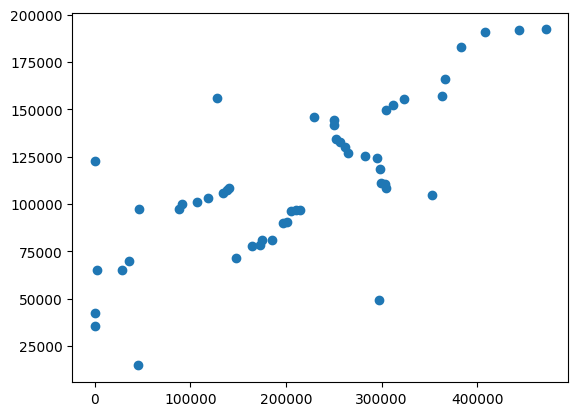

In [8]:
plt.scatter(df["Marketing Spend"].values, df.Profit.values)

In [10]:
X = df.iloc[:, :4].values
Y = df.iloc[:, 4:].values

In [11]:
X.shape, Y.shape

((50, 4), (50, 1))

In [12]:
from sklearn.linear_model import LinearRegression

test_lr = LinearRegression()
test_lr.fit(df.iloc[:, 1:2].values, Y)
test_lr.score(df.iloc[:, :1].values, Y)

0.4129501765165742

In [14]:
X[:10]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California']], dtype=object)

In [15]:
Y[:10]

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96]])

**Handling missing data :** 

Here in our dataset we luckily do not have any missing data, however when we have huge datasets it is a tedious job to go through the entire dataset to check if there is any missing data or not. Hence it is a good practice to apply imputer to the dataset as a precautionary step.

In [15]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="mean")
impute.fit(X[:, :3])
X[:, :3] = impute.transform(X[:, :3])

In [16]:
X[:10]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California']], dtype=object)

In [ ]:
df["State"].value_counts()

'''
california  1 0 0
floria      0 1 0
new york    0 0 1

'''

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

**Handling Categorical data :** 

As we have one categorical variable (State), which cannot be directly applied to the model, so we will encode it. To encode the categorical variable into numbers, we will use the LabelEncoder class. But it is not sufficient because it still has some relational order, which may create a wrong model. So in order to remove this problem, we will use OneHotEncoder.

In [18]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()
# lec.fit(X[:, 3])    # remember LabelEncoder accepts input in 1d array format
# X[:, 3] = lec.transform(X[: , 3])
X[:, 3] = lec.fit_transform(X[:, 3])

In [19]:
X[:10]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0]], dtype=object)

In [20]:
lec.classes_

array(['California', 'Florida', 'New York'], dtype=object)

## **One-Hot Encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [
        ("one_hot_encoding", OneHotEncoder(), [3])
    ],  # The column numbers to be transformed (here is [3] but can be [0, 1, 3])
    remainder="passthrough",  # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)

In [22]:
X[:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

In [23]:
ct.transformers_

[('one_hot_encoding', OneHotEncoder(), [3]),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [0, 1, 2])]

In [24]:
X[:10]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

**Avoiding Dummy Value Trap:**

As we can see in the above output, the state column has been converted into dummy variables (0 and 1). Here each dummy variable column is corresponding to the one State. We can check by comparing it with the original dataset. The first column corresponds to California State, the second column corresponds to Florida State, and the third column corresponds to New York State.

**Note:** We should not use all the dummy variables at the same time, so it must be 1 less than the total number of dummy variables, else it will create a dummy variable trap. If we do not remove the first dummy variable, then it may introduce multicollinearity in the model.

Now, we are writing a single line of code just to avoid the dummy variable trap:


In [25]:
X = X[:, 1:]

In [26]:
X[:10]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62]], dtype=object)

**standardising the input data**

In [27]:
# normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
# normalization -> (x - mean) / std -> unnomalization -> (x*std) + mean
X[:, 2:5] = sc.fit_transform(X[:, 2:5])
X[:10]

array([[0.0, 1.0, 2.016411493158463, 0.5607529145307771,
        2.1539430885717437],
       [0.0, 0.0, 1.9558603364325031, 1.0828065830760836,
        1.923600395642144],
       [1.0, 0.0, 1.7543637361407838, -0.7282570276886139,
        1.6265276693147557],
       [0.0, 1.0, 1.5547836905426, -0.09636463069766295,
        1.4222102362410107],
       [1.0, 0.0, 1.5049372036935105, -1.0799193536742695,
        1.2815277086174903],
       [0.0, 1.0, 1.2798000145910104, -0.7762390705391548,
        1.2542104579362325],
       [0.0, 0.0, 1.3400664059278975, 0.9321472084702611,
        -0.6881499302965387],
       [1.0, 0.0, 1.2450566565302281, 0.8719800111141467,
        0.932185978099574],
       [0.0, 1.0, 1.03036886075798, 0.9869521013922136,
        0.8308869091888099],
       [0.0, 0.0, 1.091819207112805, -0.45664024606220305,
        0.7761074398639786]], dtype=object)

In [29]:
sc.mean_, sc.var_**0.5

(array([ 73721.6156, 121344.6396, 211025.0978]),
 array([ 45440.91556257,  27736.20965129, 121061.23118272]))

# **Step 2: Fitting our MLR model to the Training set:**
Now, we have well prepared our dataset in order to provide training, which means we will fit our regression model to the training set. It will be similar to as we did in the Simple Linear Regression model. The code for this will be:

In [32]:
# multiple liner
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

In [33]:
mlr.fit(X, Y)

LinearRegression()

In [34]:
mlr.score(X, Y) * 100

95.07524843355148

In [35]:
mlr.coef_

array([[  198.78879286,   -41.88701913, 36626.42825194,  -748.99746924,
         3266.21519397]])

In [36]:
mlr.intercept_

array([111963.26837279])

# **Step 3:Prediction of Test set results:**

The last step for our model is checking the performance of the model. We will do it by predicting the test set result.

For that we will prive another csv file as an input as follows:

![alt text](https://lh6.googleusercontent.com/3kCiVkOH0T1GcjKiz2KDzuscLbzlFuV3KEriCZBA_LcfMOhlnAuFWHhkGSKoBEAGCTe7WEeuO0t3XXmpoYTOx7zIqP-Sph09RFjll6PfDd_4Egxu6SzuUC8IWacR8S29Gl0SaDSI)

**We will perform the same data preprocessing steps on this dataset too as follows:**


In [37]:
# let's create input data

df1 = pd.DataFrame(
    {
        "R&D Spend": 175348,
        "Administration": 116897,
        "Maketing Spend": 671784.1,
        "State": "New York",
    },
    index=[0],
)
df1

,R&D Spend,Administration,Maketing Spend,State
0,175348,116897,671784.1,New York


In [38]:
newx = df1.iloc[:, :].values
newx[:, 3] = lec.transform(newx[:, 3])
newx = ct.transform(newx)

In [39]:
newx

array([[0.0, 0.0, 1.0, 175348, 116897, 671784.1]], dtype=object)

In [40]:
newx = newx[:, 1:]
newx

array([[0.0, 1.0, 175348, 116897, 671784.1]], dtype=object)

In [41]:
newx[:, 2:] = sc.transform(newx[:, 2:])
newx

array([[0.0, 1.0, 2.236451073704175, -0.16035498923308644,
        3.8059996391791033]], dtype=object)

In [42]:
ypred = mlr.predict(newx)
ypred

array([[206385.91547451]])

**Let's look at the intercept and coefficinets**

In [43]:
mlr.coef_

array([[  198.78879286,   -41.88701913, 36626.42825194,  -748.99746924,
         3266.21519397]])

In [44]:
mlr.intercept_

array([111963.26837279])

To check how well your model is performing, you can make use of **score()** function.

In [45]:
mlr.score(X, Y)

0.9507524843355148

**This tells us that our data is approx 95% accurate.**

Now as we did for our Simple Linear Regression model, we will do same here...

we will apply our code {algorithm [written in more proper looking format this time]} and we will see both batch gradient descent and stochastic gradient descent.

In [44]:
X.T.shape, Y.shape

((5, 50), (50, 1))

In [45]:
import numpy as np

np.random.randn(5)

array([ 0.06096262, -1.93212027,  0.3568123 , -0.314273  , -1.03656207])

In [46]:
X.shape, np.random.randn(5).reshape(1, 5).shape

((50, 5), (1, 5))

In [49]:
import numpy as np
import pandas as pd


class LinearRegressionJKB:
    def __init__(self, learning_rate=0.03, iterations=3000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.intercept = 0
        self.cost_value = 0

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features).reshape(n_features, 1)
        gd_df = pd.DataFrame(columns=["weights", "bias", "cost"])
        for iter in range(self.iterations):
            # (50, 5) (5, 1) => {50, 1}
            # y = mx+c
            y_predicted = np.dot(X, self.weights) + self.intercept

            # mean squared error
            self.cost_value = (1 / n_samples) * np.sum(
                [val**2 for val in (Y - y_predicted)]
            )
            self.weights = self.weights - self.learning_rate * (
                (-2 / n_samples) * np.dot(X.T, (Y - y_predicted))
            )
            # (5, 50)(50, 1)

            # shape of y-y_predicted = (50,) - (50) => (50,)
            # shape of x = (50, 5).T => (5, 50)(50,) => (5,)

            # [w1, w2, w3, w4, w5] = [w1, w2, w3, w4, w5] - lr * [gw1, gw2, gw3, gw4, gw5]

            self.intercept = self.intercept - self.learning_rate * (
                (-2 / n_samples) * np.sum(Y - y_predicted)
            )

            gd_df.loc[iter] = [self.weights, self.intercept, self.cost_value]

        return gd_df

    def predict(self, X):
        return np.dot(X, self.weights) + self.intercept

In [50]:
regressor = LinearRegressionJKB()
model_df = regressor.fit(X, Y)
model_df.tail(10)

,weights,bias,cost
2990,"[[198.79359137675334], [-41.88252769273401], [...",111963.265017,7.840679e+07
2991,"[[198.79356618483598], [-41.882551272535444], ...",111963.265034,7.840679e+07
2992,"[[198.7935411251747], [-41.88257472854422], [3...",111963.265052,7.840679e+07
2993,"[[198.79351619707526], [-41.88259806141025], [...",111963.265069,7.840679e+07
2994,"[[198.79349139984689], [-41.88262127178015], [...",111963.265086,7.840679e+07
2995,"[[198.79346673280256], [-41.88264436029695], [...",111963.265104,7.840679e+07
2996,"[[198.79344219525882], [-41.88266732760044], [...",111963.265121,7.840679e+07
2997,"[[198.79341778653585], [-41.882690174326704], ...",111963.265138,7.840679e+07
2998,"[[198.79339350595717], [-41.88271290110916], [...",111963.265155,7.840679e+07
2999,"[[198.79336935285014], [-41.882735508577156], ...",111963.265172,7.840679e+07


In [51]:
model_df.loc[2999][0], mlr.coef_

/var/folders/zv/qv06y_fn12dcgpls9z54mk7h0000gn/T/ipykernel_89298/1371438665.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_df.loc[2999][0], mlr.coef_


(array([[198.79336935285014],
        [-41.882735508577156],
        [36626.428262778805],
        [-748.9975227921494],
        [3266.2147771500568]], dtype=object),
 array([[  198.78879286,   -41.88701913, 36626.42825194,  -748.99746924,
          3266.21519397]]))

In [52]:
mlr.intercept_

array([111963.26837279])

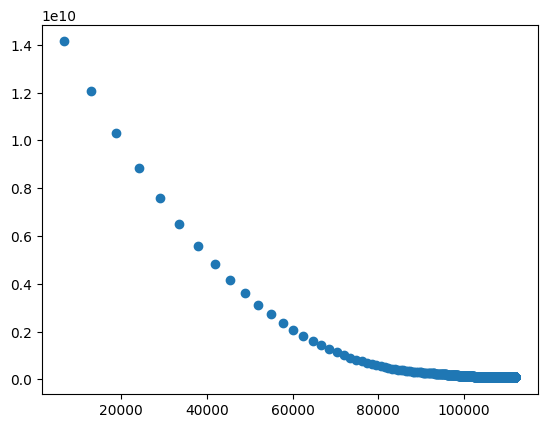

In [53]:
plt.scatter(model_df.bias.values, model_df.cost.values)

In [52]:
mlr.coef_, mlr.intercept_

(array([[  198.78879286,   -41.88701913, 36626.42825194,  -748.99746924,
          3266.21519397]]),
 array([111963.26837279]))

In [53]:
regressor.intercept, regressor.weights

(111963.26517175439,
 array([[198.793369412684],
        [-41.882735452573726],
        [36626.42826277895],
        [-748.9975227928514],
        [3266.2147771446025]], dtype=object))

In [54]:
Y_pred_jkb = regressor.predict(newx)
Y_pred_jkb

array([[206385.91500353962]], dtype=object)

Now we will go for training on the same dataset but this time we will use **stochastic gradinet descent** technique. 

Sklearn comes with the SGDRegressor class which works with this technique and reduces your computational complexity.

In [57]:
regressor.weights

array([[198.79336935285014],
       [-41.882735508577156],
       [36626.428262778805],
       [-748.9975227921494],
       [3266.2147771500568]], dtype=object)

In [54]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X, Y)
sgd_reg.intercept_, sgd_reg.coef_

/Users/ravikumarpande/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([111406.06319105]),
 array([  988.55927188,   694.39115953, 36614.53863117,  -755.78990611,
         3197.05784462]))

In [55]:
sgd_reg.predict(newx)

array([206276.27427075])

In [58]:
sgd_reg.score(X, Y)

0.9506709821248033

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png)

One of the major aspects of training your machine learning model is avoiding **overfitting**. The model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.

### **The concept of balancing bias and variance, is helpful in understanding the phenomenon of overfitting.**


One of the ways of avoiding overfitting is using cross validation, that helps in estimating the error over test set, and in deciding what parameters work best for your model.

## **Regularization**

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

A simple relation for linear regression looks like this. Here Y represents the learned relation and β represents the coefficient estimates for different variables or predictors(X).

**Y ≈ β0 + β1X1 + β2X2 + …+ βpXp**

The fitting procedure involves a loss function, known as **residual sum of squares or RSS**. The coefficients are chosen, such that they minimize this loss function.

![alt text](https://miro.medium.com/max/454/1*DY3-IaGcHjjLg7oYXx1O3A.png)

Now, this will adjust the coefficients based on your training data. If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.


## **Ridge Regression**

![alt text](https://miro.medium.com/max/553/1*CiqZ8lhwxi5c4d1nV24w4g.png)

Above image shows ridge regression, where the RSS is modified by adding the shrinkage quantity. Now, the coefficients are estimated by minimizing this function. Here, **λ is the tuning parameter that decides how much we want to penalize the flexibility of our model**. 

The increase in flexibility of a model is represented by increase in its coefficients, and if we want to minimize the above function, then these coefficients need to be small. This is how the Ridge regression technique prevents coefficients from rising too high. Also, notice that we shrink the estimated association of each variable with the response, except the intercept β0, This intercept is a measure of the mean value of the response when **xi1 = xi2 = …= xip = 0**.

When **λ = 0**, the penalty term has no eﬀect, and the estimates produced by ridge regression will be equal to least squares. However, as **λ→∞**, the impact of the shrinkage penalty grows, and the ridge regression coeﬃcient estimates will approach zero. 

As can be seen, selecting a good value of λ is critical. Cross validation comes in handy for this purpose. **The coefficient estimates produced by this method are also known as the L2 norm.**

![alt text](https://pbs.twimg.com/media/ERf2EKCWAAcLBCH.jpg)

In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X, Y)

Ridge(alpha=1)

In [59]:
ridge.coef_, ridge.intercept_

(array([[  139.62628402,   122.48568975, 35034.55848056,  -322.51866844,
          4354.05394945]]),
 array([111926.3136546]))

In [60]:
ridge.predict(newx)

array([[207025.12051312]])

In [61]:
ridge.score(X, Y)

0.9501098144524415

### **What does Regularization achieve?**
A standard least squares model tends to have some variance in it, i.e. this model won’t generalize well for a data set different than its training data. Regularization, significantly reduces the variance of the model, without substantial increase in its bias. So the tuning parameter λ, used in the regularization techniques described above, controls the impact on bias and variance. As the value of λ rises, it reduces the value of coefficients and thus reducing the variance. **Till a point, this increase in λ is beneficial as it is only reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.** But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting. Therefore, the value of λ should be carefully selected.

## **Lasso Regression**

![alt text](https://miro.medium.com/max/547/1*tHJ4sSPYV0bDr8xxEdiwXA.png)

Lasso is another variation, in which the above function is minimized. Its clear that this variation differs from ridge regression only in penalizing the high coefficients. It uses **|βj|** (modulus) instead of squares of β, as its penalty. In statistics, this is known as the **L1 norm**.

**Above Equations sheds light on the obvious disadvantage of ridge regression, which is model interpretability. It will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. However, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs variable selection and is said to yield sparse models.**

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, Y)

Lasso(alpha=0.1)

In [87]:
ridge.coef_, ridge.intercept_

(array([[  139.62628402,   122.48568975, 35034.55848056,  -322.51866844,
          4354.05394945]]),
 array([111926.3136546]))

In [88]:
lasso.coef_, lasso.intercept_

(array([  198.49330393,   -41.64873841, 36626.62838323,  -748.95759365,
         3266.0036833 ]),
 array([111963.2819138]))

In [89]:
mlr.coef_, mlr.intercept_

(array([[  198.78879286,   -41.88701913, 36626.42825194,  -748.99746924,
          3266.21519397]]),
 array([111963.26837279]))

In [90]:
lasso.predict(newx)

array([206385.80347629])

In [91]:
lasso.score(X, Y)

0.9507524842815012

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

x_ = df.iloc[:, 2:3].values
x__ = poly.fit_transform(x_)
test_lr = LinearRegression()
test_lr.fit(x__, Y)
test_lr.score(x__, Y)

0.5904434292370304

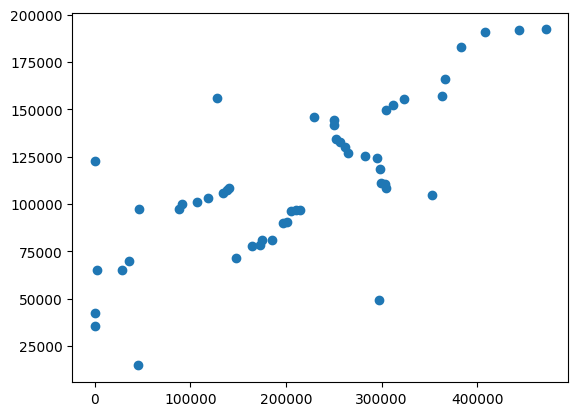

In [25]:
plt.scatter(x_, Y)